Vamos a entrenar un modelo que nos permita clasificar con la mejor precision posible, las tres clases de vino en funcion de sus caracteristicas. Vamos a elegir el mejor modelo en base a su accuracy. Pero antes vamos a cargar y vamos a realizar data visualization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-customer-segmentation/Wine.csv


Vamos a importar primero las librerias que nos van a servir para realizar el trabajo

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/wine-customer-segmentation/Wine.csv")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


Vimos que los datos son de tipo entero o flotante, por lo cual no vamos a tener inconvenientes en entrenar los distintos modelos puestos a consideracion, de modo que seguiremos adelante. Ahora vamos a ver si hay valores faltantes.

In [4]:
for c in data.columns:
    data.loc[data[c].isnull() == True]

Si corrimos las ultimas dos lineas de codigo y no nos devuelve nada, quiere decir que no hay valores faltantes en este dataset, por lo tanto podemos seguir adelante. Ahora vamos a realizar data visualization.

<AxesSubplot:>

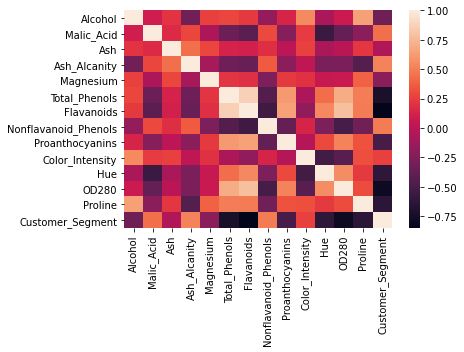

In [5]:
sns.heatmap(data.corr())

Podemos ver que Total_Phenols se correlaciona fuerte con Flavonoids, asi como tambien Flavonoids con OD280,y Total_Phenols con OD280

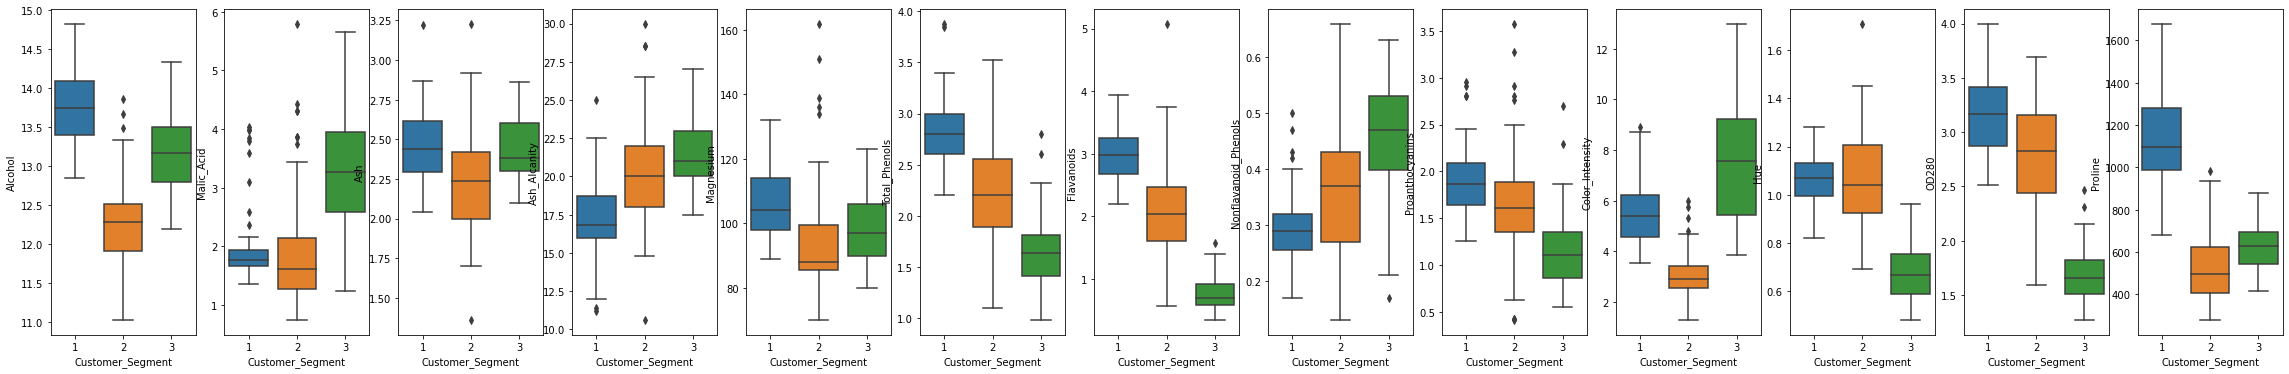

In [6]:
fig, ax = plt.subplots(1, 13, figsize = (40, 6))
columns = data.columns[0:13]

for n, columns in zip(range(0, 14), columns):
  sns.boxplot(x = data["Customer_Segment"], y = data[columns], ax = ax[n])

Podemos ver como los datos no tienen igual varianza a traves de cada tipo de consumidor. Por ejemplo en la caracteristica de Malic_Acid, podemos ver como el boxplot azul es de menor tamaño que los otros dos aunque presenta muchos outliers. A menudo tambien difieren en la mediana. Ahora vamos a ver como se distribuyen los datos de las caracteristicas dentro de cada clase. Esto es especialmente util para tener en consideracion distintos modelos

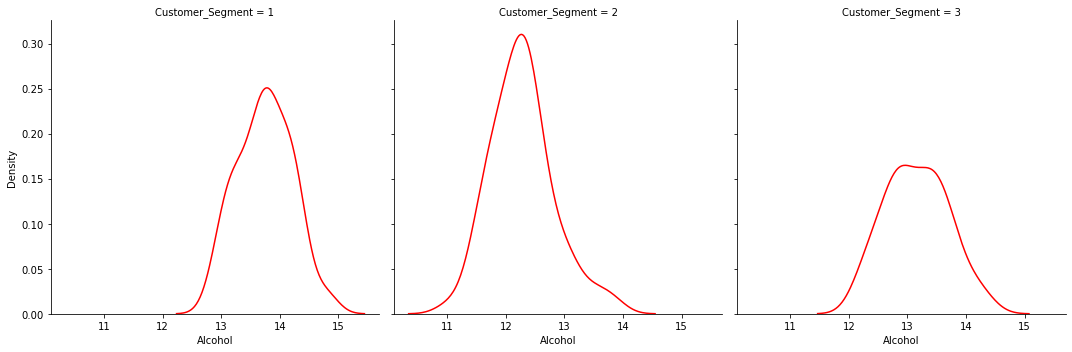

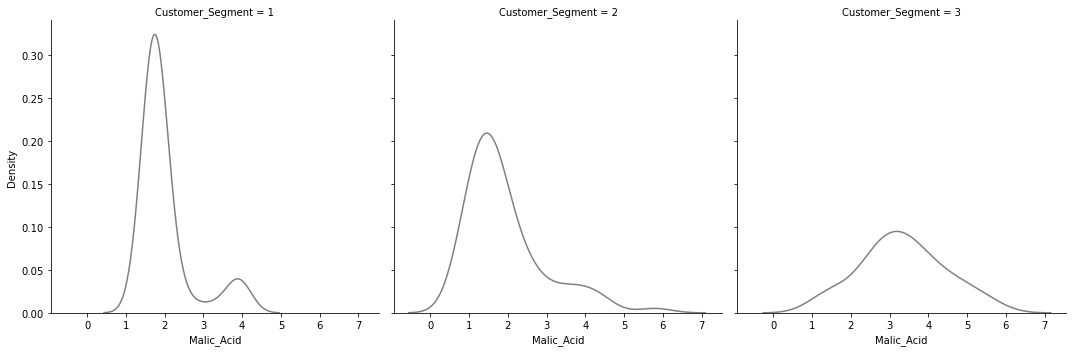

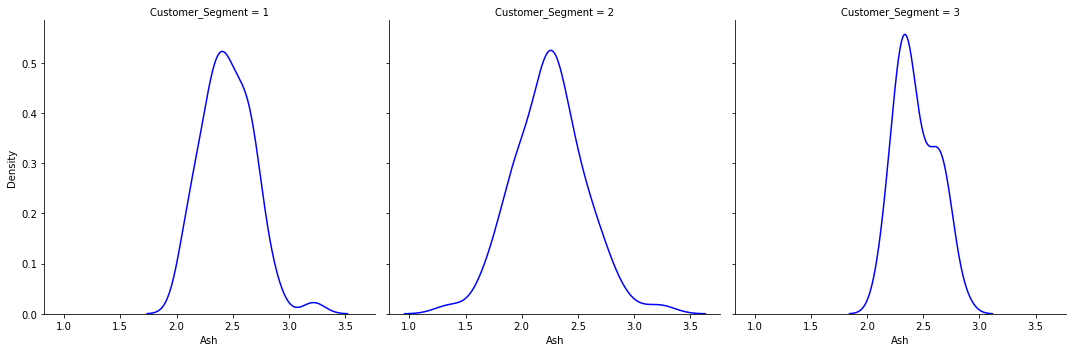

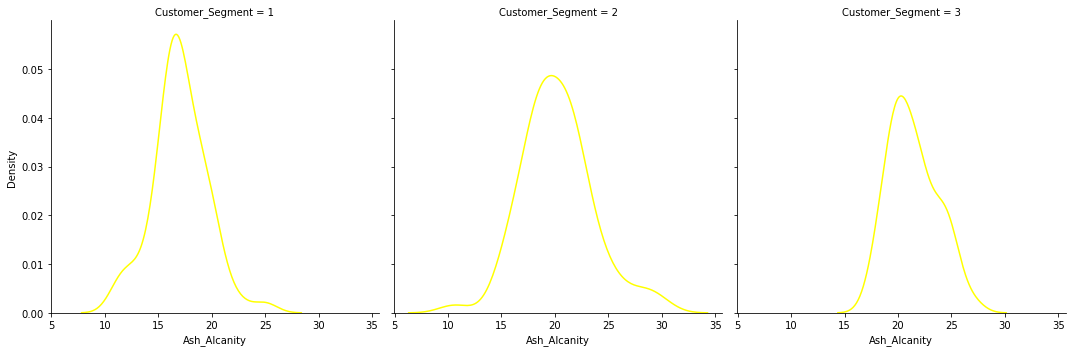

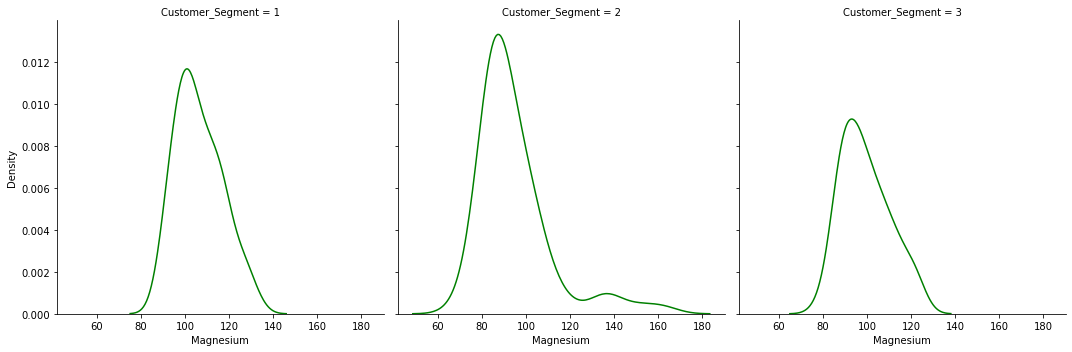

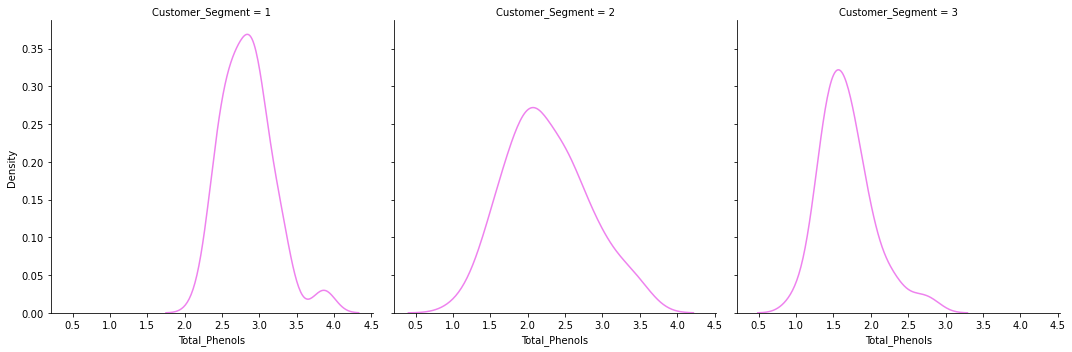

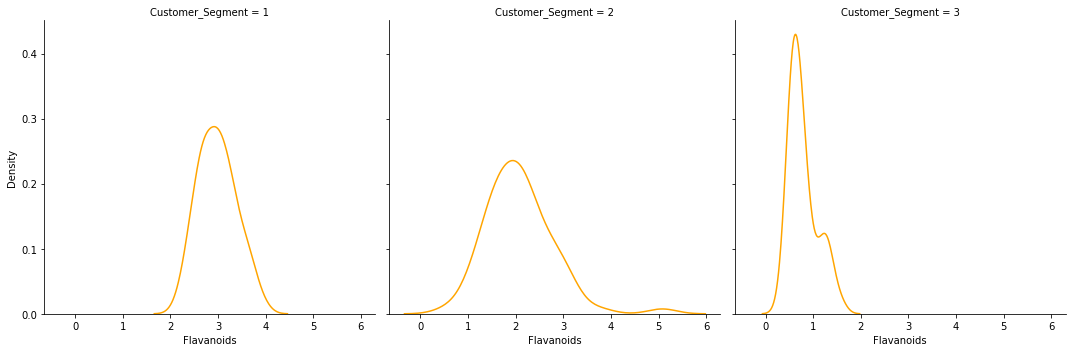

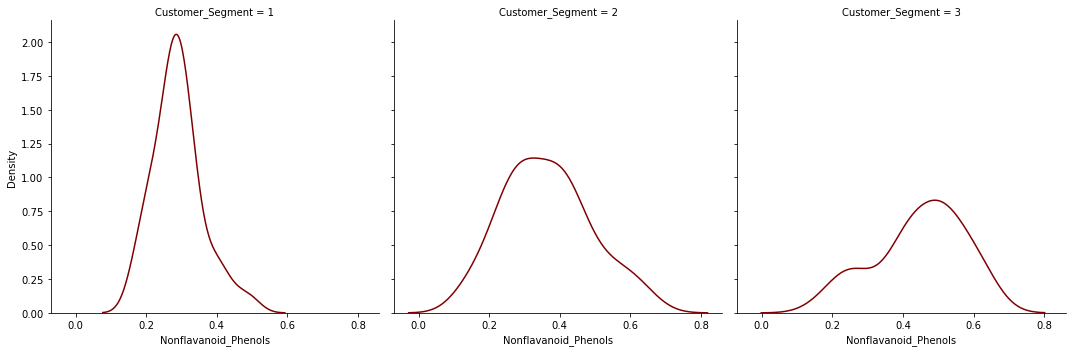

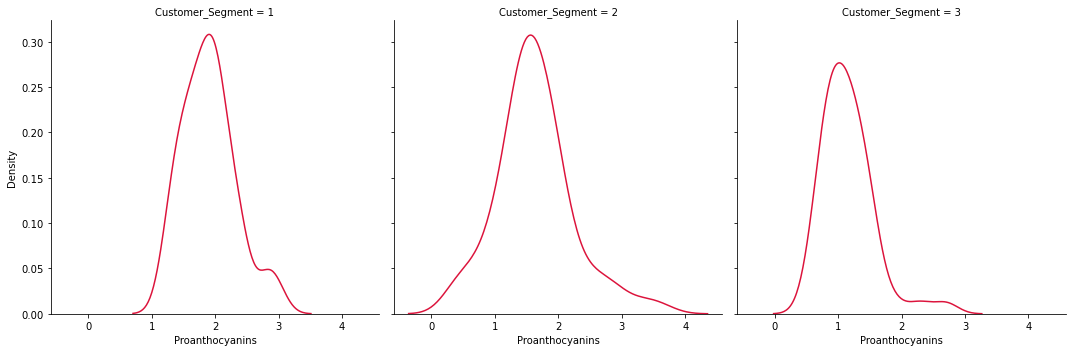

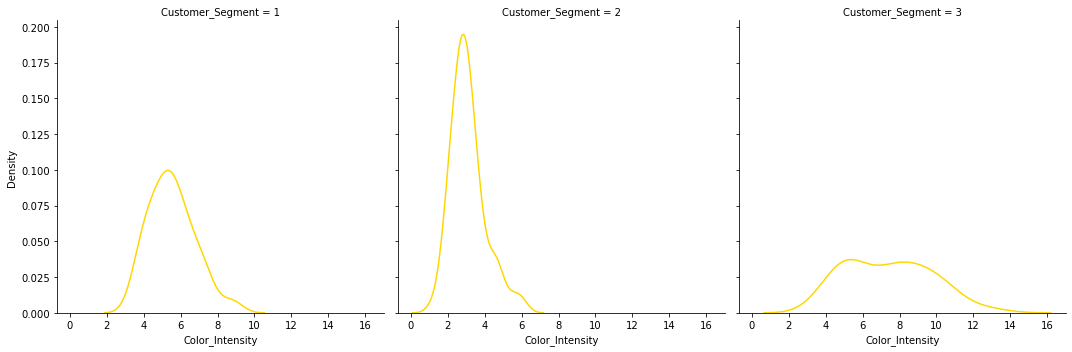

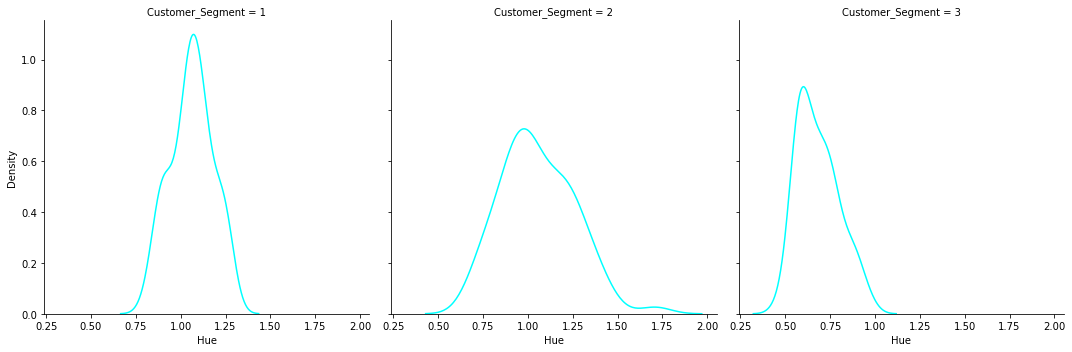

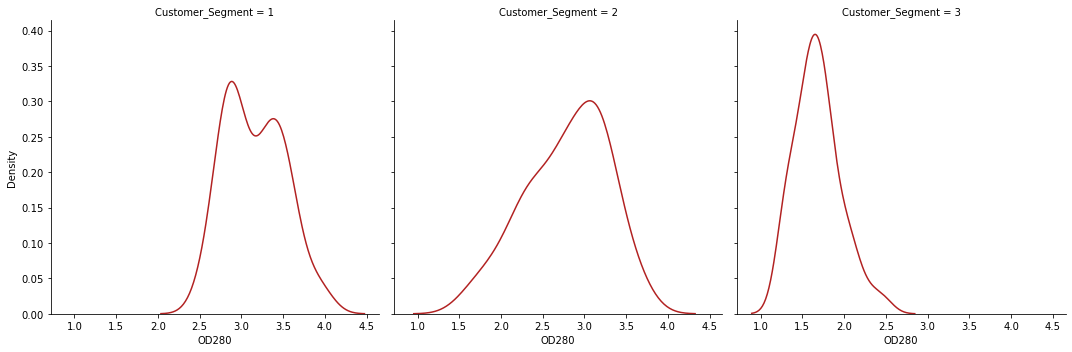

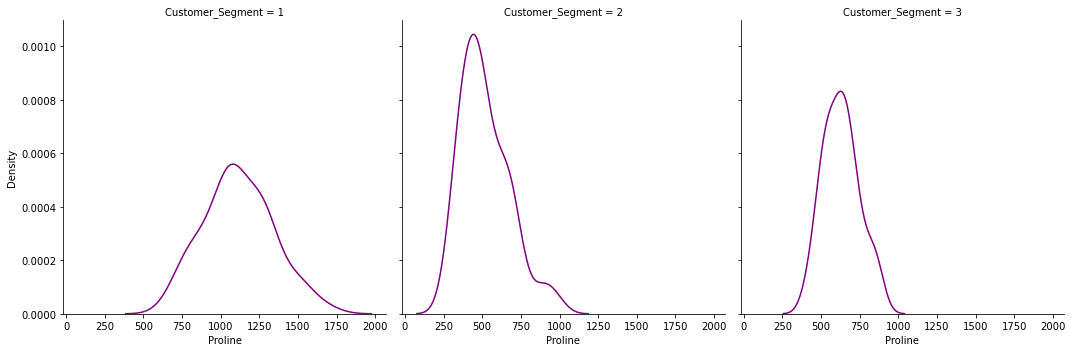

In [7]:
columns = data.columns[0:13]
colors = ["red", "gray", "blue", "yellow", "green", "violet", "orange", "maroon", "crimson", "gold", "aqua", "firebrick", "purple"]
for i, c in zip(columns, colors):
  sns.displot(data = data, x = i, col = "Customer_Segment", color = c, kind = "kde")

Podemos ver como si bien en cada caracteristica se presentan distintas varianzas en cada clase (Esto fijandonos a ojo el nivel de curtosis), podemos ver como la mayoria de cada distribucion presenta simetria. Asi que no podemos descartar de que dentro de cada clase, las caracteristicas se distribuyen normalmente. Ahora pasaremos a entrenar los distintos modelos y elegir el mejor teniendo en cuenta su accuracy

In [8]:
X = data.drop(["Customer_Segment"], axis = 1).to_numpy()
Y = data["Customer_Segment"].to_numpy()

In [9]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.5)

k_nearest = KNeighborsClassifier(n_neighbors = 5)
k_nearest.fit(X_train, Y_train)
y_pred_k_nearest = k_nearest.predict(x_test)
accuracy_score(y_test, y_pred_k_nearest)

0.7078651685393258

Pero como estos resultados pueden variar mucho dependiendo del tamaño de entrenamiento y prueba, y sobre todo del parametro n_neighbors, vamos a promediar el accuracy_score mediante cross validation y haciendo variar el parametro n_neighbors

In [10]:
train_score, validation_score = validation_curve(KNeighborsClassifier(), X, Y, "n_neighbors", np.arange(1, 20), cv = 10)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


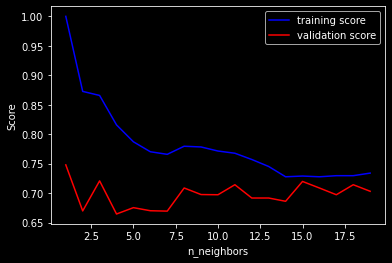

In [11]:
with plt.style.context("dark_background"):
  plt.plot(np.arange(1, 20), np.mean(train_score, 1), color = "blue", label = "training score")
  plt.plot(np.arange(1, 20), np.mean(validation_score, 1), color = "red", label = "validation score")
  plt.legend()
  plt.ylabel("Score")
  plt.xlabel("n_neighbors")

Pareciera ser que el maximo validation score se da cuando n_neighbors es igual a 1.

In [12]:
knearest_1 = KNeighborsClassifier(n_neighbors = 1)
score_knearest_1 = cross_val_score(knearest_1, X, Y, cv = 10)
score_knearest_1.mean()

0.7480392156862745

Ahora vamos a probar con otros modelos, por ejemplo un arbol de decision, a ver si obtenemos un mejor accuracy

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=max_leaf_nodes, param_range=[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


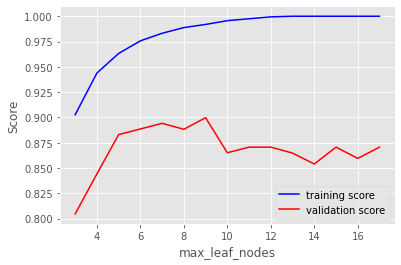

In [13]:
Tree = DecisionTreeClassifier()
train_score_Tree, validation_score_Tree = validation_curve(Tree, X, Y, "max_leaf_nodes", np.arange(3, 18), cv = 10)

with plt.style.context("ggplot"):
  plt.plot(np.arange(3, 18), np.mean(train_score_Tree, 1), color = "blue", label = "training score")
  plt.plot(np.arange(3, 18), np.mean(validation_score_Tree, 1), color = "red", label = "validation score")
  plt.legend()
  plt.ylabel("Score")
  plt.xlabel("max_leaf_nodes")

Para que el arbol no se sobreentrene, limitamos su crecimiento con el numero maximo de nodos terminales. Entonces con la funcion validation_curve variamos el numero de nodos terminales y promediamos los accuracys obtenidos del resultado de entrenar el modelo con cada nodo terminal, mediante cross_validation. Pareciera ser que el maximo valor de validation score lo obtenemos cuando el numero maximo de nodos terminales esta entre 6 y 8. Vamos a elegir por tanto un numero de nodos terminales igual a 6.

In [14]:
Tree_6 = DecisionTreeClassifier(max_leaf_nodes = 6)
score_Tree_6 = cross_val_score(Tree_6, X, Y, cv = 10)
score_Tree_6.mean()

0.8996732026143791

Vemos que tuvimos un accuracy bastante alto con el arbol de clasificacion. Ahora podemos probar con del modelo randomforest

In [15]:
Random = RandomForestClassifier(max_features = 4) #Consideramos 4 caracteristicas como parametro
score_Random = cross_val_score(Random, X, Y, cv = 10)
score_Random.mean()

0.9777777777777779

Vemos que seguimos mejorando el accuracy promedio, ahora vamos a probar con Boosting

In [16]:
Boosting = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 1000)
score_Boosting = cross_val_score(Boosting, X, Y, cv = 10)
score_Boosting.mean()

0.9104575163398693

Como anteriormente dijimos que asumiamos que las caracteristicas se distribuian normalmente dentro de cada clase, ahora podemos probar entrenando el modelo LDA para ver su performance

In [17]:
LDA = LinearDiscriminantAnalysis()
LDA_score = cross_val_score(LDA, X, Y, cv = 10)
LDA_score.mean()

0.9774509803921569

 Vemos como sorprendentemente el modelo LDA tiene mayor accuracy que los otros modelos antes entrenados. Entonces podriamos que darnos con este modelo al ver su nivel de prediccion. Finalmente vamos a entrenarlo con todas las observaciones, obtener los coeficiente y ver las probabilidades a priori

In [18]:
LDA.fit(X, Y)

LinearDiscriminantAnalysis()

In [19]:
LDA.priors_ #Obtenemos la probabilidad a priori de cada clase

array([0.33146067, 0.3988764 , 0.26966292])

In [20]:
LDA.means_ #Obtenemos la media de cada caracteristica dentro de cada clase

array([[1.37447458e+01, 2.01067797e+00, 2.45559322e+00, 1.70372881e+01,
        1.06338983e+02, 2.84016949e+00, 2.98237288e+00, 2.90000000e-01,
        1.89932203e+00, 5.52830508e+00, 1.06203390e+00, 3.15779661e+00,
        1.11571186e+03],
       [1.22787324e+01, 1.93267606e+00, 2.24478873e+00, 2.02380282e+01,
        9.45492958e+01, 2.25887324e+00, 2.08084507e+00, 3.63661972e-01,
        1.63028169e+00, 3.08661972e+00, 1.05628169e+00, 2.78535211e+00,
        5.19507042e+02],
       [1.31537500e+01, 3.33375000e+00, 2.43708333e+00, 2.14166667e+01,
        9.93125000e+01, 1.67875000e+00, 7.81458333e-01, 4.47500000e-01,
        1.15354167e+00, 7.39624998e+00, 6.82708333e-01, 1.68354167e+00,
        6.29895833e+02]])

Ahora finalmente obtendremos los coeficientes del modelo

In [21]:
LDA.coef_

array([[ 2.85542117e+00, -4.89788666e-02,  5.23156990e+00,
        -7.77422596e-01,  6.62170776e-03, -2.16976970e+00,
         4.85310738e+00,  2.36037857e+00, -9.78422688e-01,
        -7.86790206e-01,  2.35758911e-01,  4.04832027e+00,
         1.40369442e-02],
       [-2.12348259e+00, -7.68274072e-01, -5.77105386e+00,
         3.49607787e-01,  1.31672488e-03,  3.03762476e-02,
         1.34898232e+00,  4.15204322e+00,  7.48631160e-01,
        -6.54459561e-01,  3.81286126e+00, -3.42724866e-02,
        -6.83988909e-03],
       [-3.68803859e-01,  1.19660859e+00,  2.10587916e+00,
         4.38453756e-01, -1.00868380e-02,  2.62207706e+00,
        -7.96064750e+00, -9.04286258e+00,  9.52942959e-02,
         1.93515106e+00, -5.92964428e+00, -4.92536562e+00,
        -7.13640797e-03]])